# Here I test how to prepare initial AFM state of the system

In [2]:
#Qiskit modules
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

## Creasting AFM state in the tight-binding model and half filling case.

!Not only an AFM state is produced but a combination of two degenerate AFM states are created. This is important for the optimization problem.

We have n sites and 2 * n quabits to describe both spins and space coordinates. 
We assume that first half of the quabits is spin-up states and the second half is pin-doqn qubits.


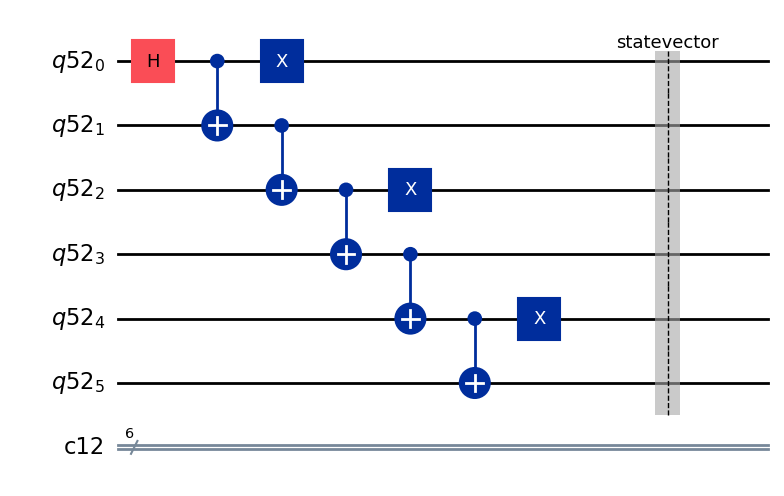

In [25]:
n_sites = 3
n_qubits = n_sites *2
q_r = Q_R(n_qubits)
c_r = C_R(n_qubits)
qc_init = QuantumCircuit(q_r,c_r)



qc_init.h(0)
#qc_init.x(1)
#qc_init.x(3)

for i in range(2 * n_sites - 1):
    qc_init.cx(i, i + 1)

#for i in range(n_sites):
#    qc_init.x((i - 1) * 2 + 1)

for i in range(n_sites):
    if i % 2 == 0:
        qc_init.x(i)
for i in range(n_sites, 2 * n_sites):
    if (i - n_sites) % 2 != 0:
        qc_init.x(i)

#qc_init.h(n_qubits - 1)
#qc_init.cx(n_qubits - 1, 0)

#for i in range(n_qubits):
#    qc_init.measure(i,i)

qc_init.save_statevector()

qc_init.draw('mpl')



In [26]:
SimulatorAer = AerSimulator()
circ = transpile(qc_init, backend = SimulatorAer)
result = SimulatorAer.run(circ,shots = 1).result()
ground_state = result.get_statevector(circ)

import sys
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
import aux_func as af
n_nonzero = 0
n_states = pow(2, 2 * n_sites)
states = []
prob = []
for i in range(n_states):
    pr = pow(abs(ground_state[i]), 2)
    if pr>1/n_states:
        n_nonzero = n_nonzero + 1
        states.append(i)
        prob.append(pr)
        print('state: ' + str(af.int_2_bin_word(i, 2 * n_sites)) + ', prob: ' + str(pr) + ', complex amplitude: ' + str(ground_state[i]))
    


state: 010101, prob: 0.5000000000000001, complex amplitude: (0.7071067811865476+0j)
state: 101010, prob: 0.5000000000000001, complex amplitude: (0.7071067811865476+0j)


# Filling is diiferent than half-filling. States with zero total spin



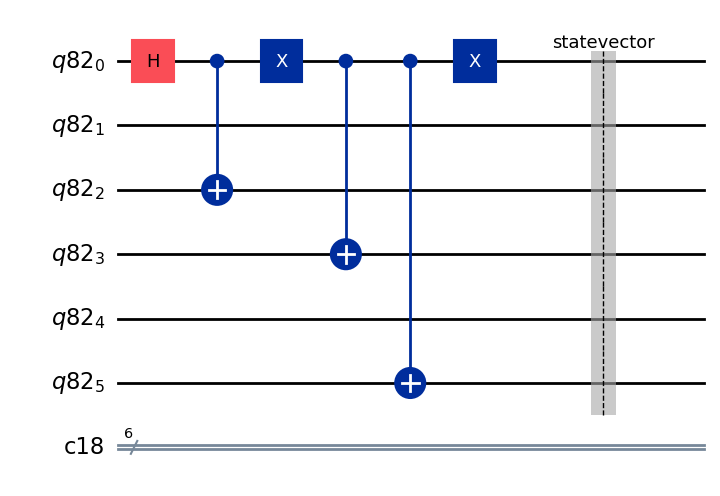

In [37]:
n_sites = 3
n_qubits = n_sites *2
n_el = 2
occupied_states = [0, 2]
q_r = Q_R(n_qubits)
c_r = C_R(n_qubits)
qc_init = QuantumCircuit(q_r,c_r)



qc_init.h(0)



for i in range(n_el - 1):
    qc_init.cx(0, occupied_states[i + 1])

qc_init.x(0)

qc_init.cx(0, n_sites)

for i in range(n_el - 1):
    qc_init.cx(0, occupied_states[i + 1] + n_sites)

qc_init.x(0)

qc_init.save_statevector()

qc_init.draw('mpl')


In [39]:
SimulatorAer = AerSimulator()
circ = transpile(qc_init, backend = SimulatorAer)
result = SimulatorAer.run(circ,shots = 1).result()
ground_state = result.get_statevector(circ)

import sys
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
import aux_func as af
n_nonzero = 0
n_states = pow(2, 2 * n_sites)
states = []
prob = []
for i in range(n_states):
    pr = pow(abs(ground_state[i]), 2)
    if pr>1/n_states:
        n_nonzero = n_nonzero + 1
        states.append(i)
        prob.append(pr)
        print('state: ' + str(af.int_2_bin_word(i, 2 * n_sites)) + ', prob: ' + str(pr) + ', complex amplitude: ' + str(ground_state[i]))
    


state: 000101, prob: 0.5000000000000001, complex amplitude: (0.7071067811865476+0j)
state: 101000, prob: 0.5000000000000001, complex amplitude: (0.7071067811865476+0j)
